In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df=pd.read_csv('D:/GitHub/Supervised-Machine-Learning/data/Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [2]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#define feature and target variables
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']

#standardize the target variable
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

#standardize the feature variable
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [4]:
print(type(X))
print(type(Y))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(200, 1)


In [5]:
def initialize(dim):
    #initialize intercept (b) and weight (a) with a random float between 0 and 1
    b=random.random()
    a=np.random.rand(dim)
    return b,a

print(initialize(X.shape[1]))

(0.16727607871018524, array([0.51676703]))


In [6]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [7]:
#calculate Mean Squared Error (MSE)
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [8]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [9]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance =  0.000001
    b,theta=initialize(X.shape[1])
    
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0 
    
    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1   
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta
        
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df.tail())

     iteration   value_b  value_weight      cost
250      250.0  0.004945      0.574562  0.664656
251      251.0  0.004846      0.574595  0.664655
252      252.0  0.004749      0.574627  0.664654
253      253.0  0.004654      0.574659  0.664653
254      254.0  0.004561      0.574690  0.664652


<Axes: xlabel='value_weight', ylabel='cost'>

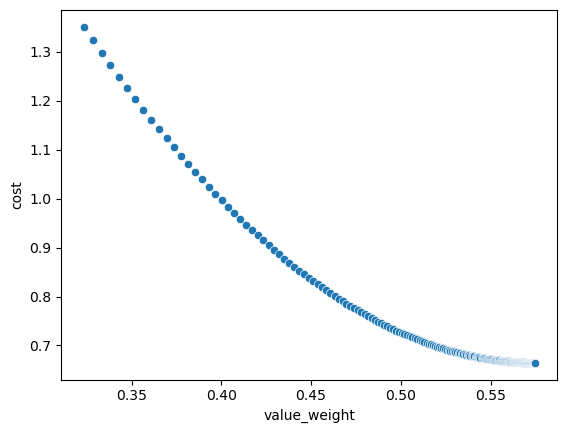

In [10]:
sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [11]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
print(best_parameters)
print(best_parameters['value_weight'])

value_b         0.004561
value_weight    0.574690
Name: 254, dtype: float64
0.5746903455033106


In [12]:
# extract the original "radio" data 
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x


In [13]:
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X

# calculate Mean Absolute Error (MAE)
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))
print(y_p.head())

print(np.sum(((np.abs(Y- y_p[sel_program]))>0.5)))

radio 0.6358241972489551 0.6646508436440677
      radio
1  0.567220
2  0.625282
3  0.880755
4  0.702698
5 -0.477896
100


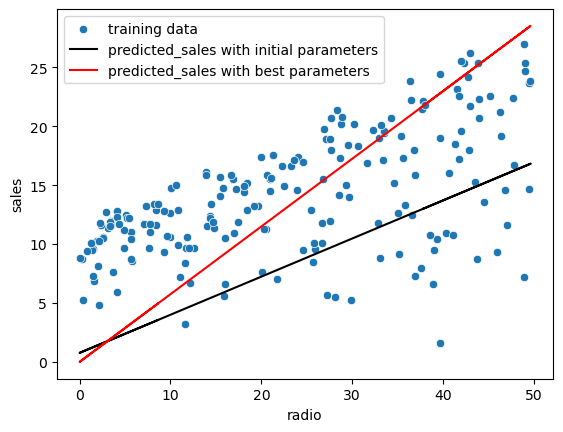

In [14]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()